In [4]:
#20MID0073 AI2

#reading dataset and data preprocessing
##IMPORTING THE LIBRARIES 
import pandas as pd

import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Flatten, Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np 
import seaborn as sns

import matplotlib.pyplot as mp

#LOAD THE DATASET 
dataset=pd.read_csv('/drug200.csv')
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
dataset.shape


(200, 6)

In [6]:
dataset.isnull().any()
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
dataset.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [8]:
dataset['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: >

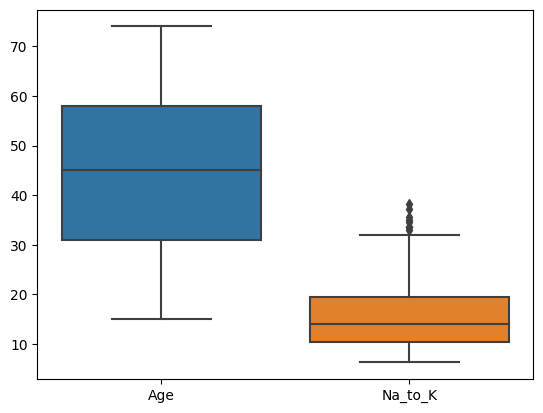

In [9]:
sns.boxplot(dataset)

<ipython-input-10-ce6144e4b455>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot = True)


<Axes: >

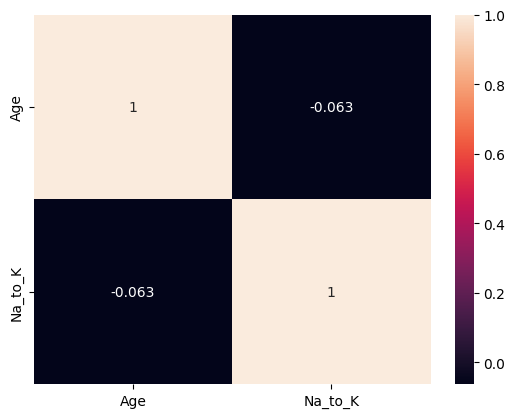

In [10]:
sns.heatmap(dataset.corr(),annot = True)

<ipython-input-11-4b706c5cc5c3>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.cov(),annot=True)


<Axes: >

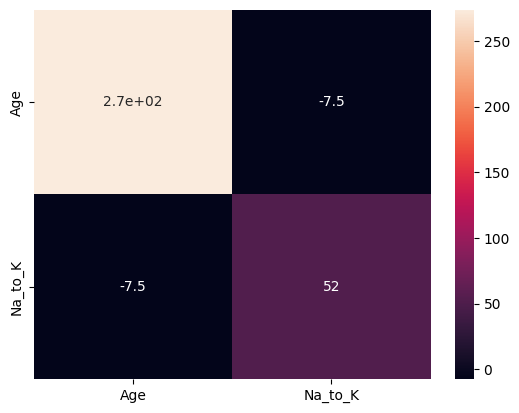

In [11]:
sns.heatmap(dataset.cov(),annot=True)

<ipython-input-12-4e19d2bfaa9c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Na_to_K'])


<Axes: xlabel='Na_to_K', ylabel='Density'>

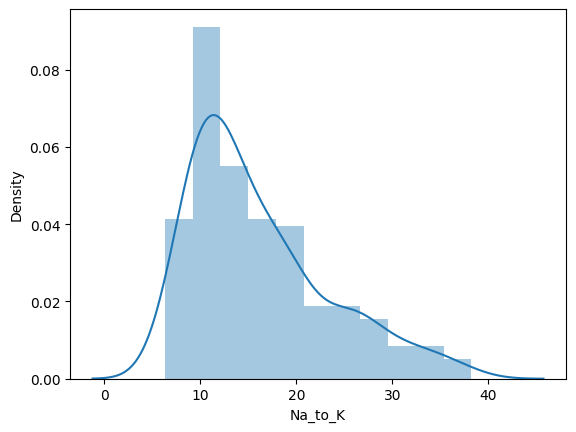

In [12]:
sns.distplot(dataset['Na_to_K'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

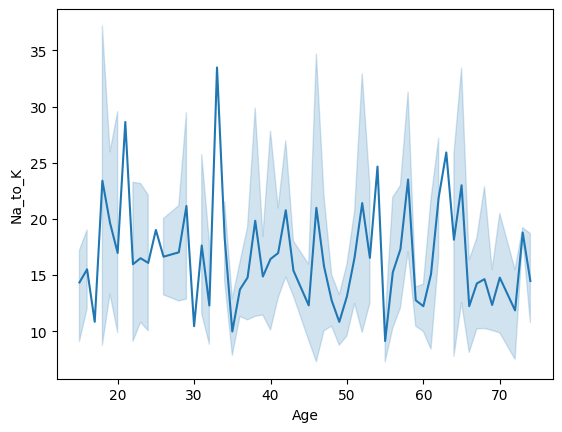

In [14]:
sns.lineplot(x = dataset['Age'],y = dataset['Na_to_K'])


In [15]:
# Encode categorical variables
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['BP'] = label_encoder.fit_transform(dataset['BP'])
dataset['Cholesterol'] = label_encoder.fit_transform(dataset['Cholesterol'])
# Normalize numerical variables
scaler = StandardScaler()
dataset[['Age', 'Na_to_K']] = scaler.fit_transform(dataset[['Age', 'Na_to_K']])
# Split the data into features and labels
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
y = pd.get_dummies(dataset.iloc[:,5:]).values
print(dataset['Drug'].unique())


['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)

          Age  Sex  BP  Cholesterol   Na_to_K
0   -1.291591    0   0            0  1.286522
1    0.162699    1   1            0 -0.415145
2    0.162699    1   1            0 -0.828558
3   -0.988614    0   2            0 -1.149963
4    1.011034    0   1            0  0.271794
..        ...  ...  ..          ...       ...
195  0.708057    0   1            0 -0.626917
196 -1.715759    1   1            0 -0.565995
197  0.465676    1   2            0 -0.859089
198 -1.291591    1   2            1 -0.286500
199 -0.261469    0   1            1 -0.657170

[200 rows x 5 columns]
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 

In [17]:
X.shape,y.shape


((200, 5), (200, 5))

In [18]:
#Task 2: Build the ANN Model
# Build the ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1])) # Input layer
model.add(Dense(16, activation='relu')) # Hidden layer 1
model.add(Dense(8, activation='relu')) # Hidden layer 2
model.add(Dense(4, activation='relu')) # Hidden layer 3
model.add(Dense(5, activation='softmax')) # Output layer

In [20]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 5)                 25        
                                                                 
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/10
32/32 [==============================] - 2s 11ms/step - loss: 1.5651 - accuracy: 0.1125 - val_loss: 1.5456 - val_accuracy: 0.1750
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.4925 - accuracy: 0.0812 - val_loss: 1.4997 - val_accuracy: 0.0500
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.4245 - accuracy: 0.1813 - val_loss: 1.4565 - val_accuracy: 0.3750
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1.3583 - accuracy: 0.3562 - val_loss: 1.4081 - val_accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 1.2793 - accuracy: 0.5063 - val_loss: 1.3307 - val_accuracy: 0.5250
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1792 - accuracy: 0.7000 - val_loss: 1.2341 - val_accuracy: 0.6750
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0473 - accuracy: 0.8062 - val_loss: 1.1086 - val_accuracy: 0.7250
Epoch 8/10
32/32 [=

In [23]:
ypred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step
